### LSTM을 사용한 언어 모델

In [1]:
import sys
sys.path.append('..')
from common.time_layers import *
from common.base_model import BaseModel


class Rnnlm(BaseModel):
    def __init__(self, vocab_size=10000, wordvec_size=100, hidden_size=100):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        # 가중치 초기화
        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        # 계층 생성
        self.layers = [
            TimeEmbedding(embed_W),
            TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True),
            TimeAffine(affine_W, affine_b)
        ]
        self.loss_layer = TimeSoftmaxWithLoss()
        self.lstm_layer = self.layers[1]

        # 모든 가중치와 기울기를 리스트에 모은다.
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, xs):
        for layer in self.layers:
            xs = layer.forward(xs)
        return xs

    def forward(self, xs, ts):
        score = self.predict(xs)
        loss = self.loss_layer.forward(score, ts)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

    def reset_state(self):
        self.lstm_layer.reset_state()


### 학습을 위한 코드

| 에폭 1 |  반복 1 / 1327 | 시간 0[s] | 퍼플렉서티 10000.88
| 에폭 1 |  반복 21 / 1327 | 시간 3[s] | 퍼플렉서티 3006.61
| 에폭 1 |  반복 41 / 1327 | 시간 6[s] | 퍼플렉서티 1208.78
| 에폭 1 |  반복 61 / 1327 | 시간 9[s] | 퍼플렉서티 968.19
| 에폭 1 |  반복 81 / 1327 | 시간 12[s] | 퍼플렉서티 801.15
| 에폭 1 |  반복 101 / 1327 | 시간 16[s] | 퍼플렉서티 640.26
| 에폭 1 |  반복 121 / 1327 | 시간 19[s] | 퍼플렉서티 640.01
| 에폭 1 |  반복 141 / 1327 | 시간 22[s] | 퍼플렉서티 603.60
| 에폭 1 |  반복 161 / 1327 | 시간 25[s] | 퍼플렉서티 587.85
| 에폭 1 |  반복 181 / 1327 | 시간 28[s] | 퍼플렉서티 569.44
| 에폭 1 |  반복 201 / 1327 | 시간 32[s] | 퍼플렉서티 501.59
| 에폭 1 |  반복 221 / 1327 | 시간 35[s] | 퍼플렉서티 485.87
| 에폭 1 |  반복 241 / 1327 | 시간 38[s] | 퍼플렉서티 440.84
| 에폭 1 |  반복 261 / 1327 | 시간 41[s] | 퍼플렉서티 459.95
| 에폭 1 |  반복 281 / 1327 | 시간 44[s] | 퍼플렉서티 461.54
| 에폭 1 |  반복 301 / 1327 | 시간 47[s] | 퍼플렉서티 386.89
| 에폭 1 |  반복 321 / 1327 | 시간 51[s] | 퍼플렉서티 342.30
| 에폭 1 |  반복 341 / 1327 | 시간 54[s] | 퍼플렉서티 399.21
| 에폭 1 |  반복 361 / 1327 | 시간 57[s] | 퍼플렉서티 398.65
| 에폭 1 |  반복 381 / 1327 | 시간 60[s] | 퍼플렉서티 331.42
| 에폭 1

| 에폭 3 |  반복 541 / 1327 | 시간 512[s] | 퍼플렉서티 135.63
| 에폭 3 |  반복 561 / 1327 | 시간 515[s] | 퍼플렉서티 118.81
| 에폭 3 |  반복 581 / 1327 | 시간 518[s] | 퍼플렉서티 105.46
| 에폭 3 |  반복 601 / 1327 | 시간 521[s] | 퍼플렉서티 149.20
| 에폭 3 |  반복 621 / 1327 | 시간 524[s] | 퍼플렉서티 140.97
| 에폭 3 |  반복 641 / 1327 | 시간 528[s] | 퍼플렉서티 127.97
| 에폭 3 |  반복 661 / 1327 | 시간 531[s] | 퍼플렉서티 118.99
| 에폭 3 |  반복 681 / 1327 | 시간 534[s] | 퍼플렉서티 100.22
| 에폭 3 |  반복 701 / 1327 | 시간 537[s] | 퍼플렉서티 118.12
| 에폭 3 |  반복 721 / 1327 | 시간 540[s] | 퍼플렉서티 127.21
| 에폭 3 |  반복 741 / 1327 | 시간 544[s] | 퍼플렉서티 107.32
| 에폭 3 |  반복 761 / 1327 | 시간 547[s] | 퍼플렉서티 103.47
| 에폭 3 |  반복 781 / 1327 | 시간 550[s] | 퍼플렉서티 106.28
| 에폭 3 |  반복 801 / 1327 | 시간 553[s] | 퍼플렉서티 114.92
| 에폭 3 |  반복 821 / 1327 | 시간 556[s] | 퍼플렉서티 117.25
| 에폭 3 |  반복 841 / 1327 | 시간 560[s] | 퍼플렉서티 113.47
| 에폭 3 |  반복 861 / 1327 | 시간 563[s] | 퍼플렉서티 121.63
| 에폭 3 |  반복 881 / 1327 | 시간 566[s] | 퍼플렉서티 106.70
| 에폭 3 |  반복 901 / 1327 | 시간 569[s] | 퍼플렉서티 131.57
| 에폭 3 |  반복 921 / 1327 | 시간 57

C:\Users\jikim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jikim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jikim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jikim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 54540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jikim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47113 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jikim\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49436 missing from c

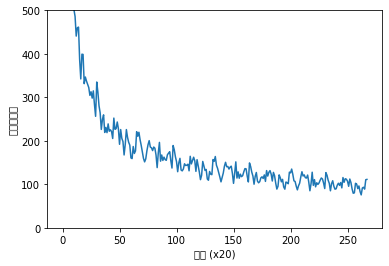

퍼플렉서티 평가 중 ...
234 / 235
테스트 퍼플렉서티:  134.2510056100463


In [2]:
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import RnnlmTrainer
from common.util import eval_perplexity
from dataset import ptb
from rnnlm import Rnnlm


# 하이퍼파라미터 설정
batch_size = 20
wordvec_size = 100
hidden_size = 100  # RNN의 은닉 상태 벡터의 원소 수
time_size = 35     # RNN을 펼치는 크기
lr = 20.0
max_epoch = 4
max_grad = 0.25

# 학습 데이터 읽기
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_test, _, _ = ptb.load_data('test')
vocab_size = len(word_to_id)
xs = corpus[:-1]
ts = corpus[1:]

# 모델 생성
model = Rnnlm(vocab_size, wordvec_size, hidden_size)
optimizer = SGD(lr)
trainer = RnnlmTrainer(model, optimizer)

# 기울기 클리핑을 적용하여 학습
trainer.fit(xs, ts, max_epoch, batch_size, time_size, max_grad,
            eval_interval=20)
trainer.plot(ylim=(0, 500))

# 테스트 데이터로 평가
model.reset_state()
ppl_test = eval_perplexity(model, corpus_test)
print('테스트 퍼플렉서티: ', ppl_test)

# 매개변수 저장
model.save_params()